In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.data_preprocess as preprocess
from utils.model_metrics import ModelMetric
from utils.mode_figure import ModelFigre
import datetime
from utils.model_callback import step_decay, exp_decay

In [2]:
modelmetric = ModelMetric()

In [3]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [4]:
X_train = tf.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = tf.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [5]:
import utils.network.network12 as model

In [6]:
net = model.MyLstmModel()

In [7]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, clipnorm=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
# algorithm = tf.keras.optimizers.SGD(learning_rate=0.035, momentum=0.95, nesterov=True, name='SGD')
net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=modelmetric.metric('binary_crossentropy')) # categorical_crossentropy

In [8]:
from tensorflow.keras import callbacks
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network-RMSprop")

logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(step_decay)
csv_log = tf.keras.callbacks.CSVLogger('../model_record/'+dir_name+"/log", separator=',', append=False)
if not os.path.isdir('../model_record/'+dir_name):
    os.mkdir('../model_record/'+dir_name)

In [9]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log], verbose=1) # lrate

: 328303.0000 - fp: 11121.0000 - tn: 328303.0000 - fn: 11121.0000 - acc: 0.0409 - precision: 0.9672 - recall: 0.9672 - auc: 0.9949 - binary_accuracy: 0.9672 - binary_crossentropy: 0.0871 - val_loss: 0.0585 - val_tp: 142283.0000 - val_fp: 3185.0000 - val_tn: 142283.0000 - val_fn: 3185.0000 - val_acc: 0.1155 - val_precision: 0.9781 - val_recall: 0.9781 - val_auc: 0.9977 - val_binary_accuracy: 0.9781 - val_binary_crossentropy: 0.0585
Epoch 4/40
663/663 [==============================] - 52s 78ms/step - loss: 0.0835 - tp: 328815.0000 - fp: 10609.0000 - tn: 328815.0000 - fn: 10609.0000 - acc: 0.0408 - precision: 0.9687 - recall: 0.9687 - auc: 0.9952 - binary_accuracy: 0.9687 - binary_crossentropy: 0.0835 - val_loss: 0.0572 - val_tp: 142052.0000 - val_fp: 3416.0000 - val_tn: 142052.0000 - val_fn: 3416.0000 - val_acc: 0.0000e+00 - val_precision: 0.9765 - val_recall: 0.9765 - val_auc: 0.9977 - val_binary_accuracy: 0.9765 - val_binary_crossentropy: 0.0572
Epoch 5/40
663/663 [===================

In [10]:
results  = net.evaluate(X_test, y_test, verbose=1)
modelmetric.getTrainMetricValue(net, results)

6495/6495 [==============================] - 173s 27ms/step - loss: 0.0473 - tp: 204210.0000 - fp: 3601.0000 - tn: 204210.0000 - fn: 3601.0000 - acc: 0.1222 - precision: 0.9827 - recall: 0.9827 - auc: 0.9986 - binary_accuracy: 0.9827 - binary_crossentropy: 0.0473
loss :  0.047259822487831116
tp :  204210.0
fp :  3601.0
tn :  204210.0
fn :  3601.0
acc :  0.12219276279211044
precision :  0.9826717376708984
recall :  0.9826717376708984
auc :  0.9985670447349548
binary_accuracy :  0.9826717376708984
binary_crossentropy :  0.047259822487831116


In [11]:
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
modelmetric.confusion_matrix(y_label, y_class)
modelmetric.eva_metric(y_label, y_class)

TrueNegatives result:  128550.0
TruePositives result:  75660.0
FalseNegatives result:  216.0
FalsePositives result:  3385.0
Recall result:  0.9971532
Precision result:  0.95717627


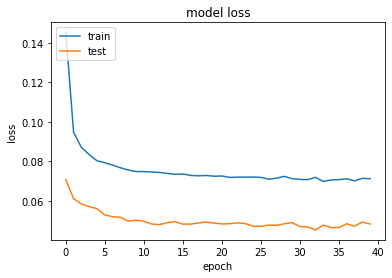

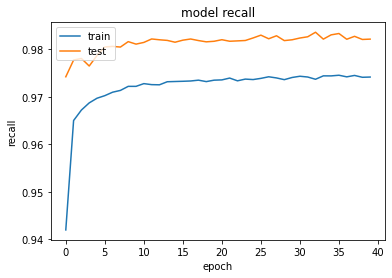

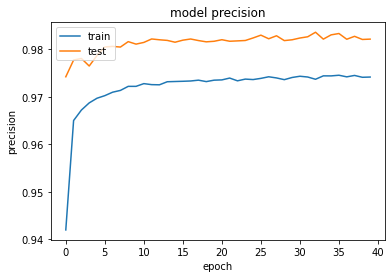

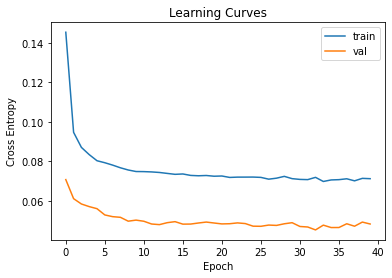

In [12]:
mf = ModelFigre("../model_record", dir_name, model_)
mf.loss_graph()
mf.recall_graph()
mf.precision_graph()
mf.cross_entropy_graph()
# fig.save_model(net,dir_name)

In [13]:
# mf.lr_graph(model_, dir_name)